# Customer Churn Analysis:
# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
# Importing Necessory Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer

# Models:
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


#Matrics for evaluation:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score

In [2]:
#READ THE DATASET
df=pd.read_csv('C:/Users/HP/Desktop/data sets/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. In the survey done in the Telecom industry, it is stated that the cost of acquiring a new customer is far more that retaining the existing one. Therefore, by collecting knowledge from the telecom industries can help in predicting the association of the customers as whether or not they will leave the company. The required action needs to be undertaken by the telecom industries in order to initiate the acquisition of their associated customers for making their market value stagnant. Our project proposes a new framework for the churn prediction model and implements it using by different machine learning models. 
- we have got one dependendent feature and different independent features for predicting the customer churn in the dataseet.Here the dependent variable, column Churn is our Target which contains only Yeas and no,thus this problem is a classification problem.
- The continuous features are SeniorCitizen,tenure and MonthlyCharges.
- The oject type features are-  customerID,gender,Partner,'Dependents',PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection, TechSupport,StreamingTV, StreamingMovies,Contract, PaperlessBilling,PaymentMethod, MonthlyCharges,TotalCharges and Churn.

In [3]:
df.shape

(7043, 21)

- The dataset contains 7043 rows and 21 columns.That means we have total details of 7043 people.

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- Found out all the column names of the Dataset.There are total 21 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- The continuous features are SeniorCitizen,tenure and MonthlyCharges.
- The oject type features are- customerID,gender,Partner,'Dependents',PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection, TechSupport,StreamingTV, StreamingMovies,Contract, PaperlessBilling,PaymentMethod, MonthlyCharges,TotalCharges and Churn.

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

- There are total 7043 customer details in this dataset.
- we can see the uniqueness of the features or the types of objects present in the features.

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- The continuous features are SeniorCitizen,tenure and MonthlyCharges.
- The oject type features are- customerID,gender,Partner,'Dependents',PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection, TechSupport,StreamingTV, StreamingMovies,Contract, PaperlessBilling,PaymentMethod, MonthlyCharges,TotalCharges and Churn.

In [8]:
# Statistical summary:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- We can only see the statistical summary of the continuous features,of the dataset which are SeniorCitizen,tenure and monthly charges.
- There  is ony two values in Senior Citizen column ,which are 0 and 1.
- The maximum tenure is 72 months and minimum is showing 0,this quite impossible because a telecom company always offers a customer wit a tenure.
- The minimum monthly charges are 18.25 and the maximum monthly charges is 118.75.
- The inter Quartile ranges of Tenure and Monthly charges are good in numbers.There is no abnormality.

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There is no missing values in this dataset.

# EDA:

# UNIVARIATE ANALYSIS:

In [10]:
#Separating the continuous features:
con_features=df[['SeniorCitizen','tenure','MonthlyCharges']]

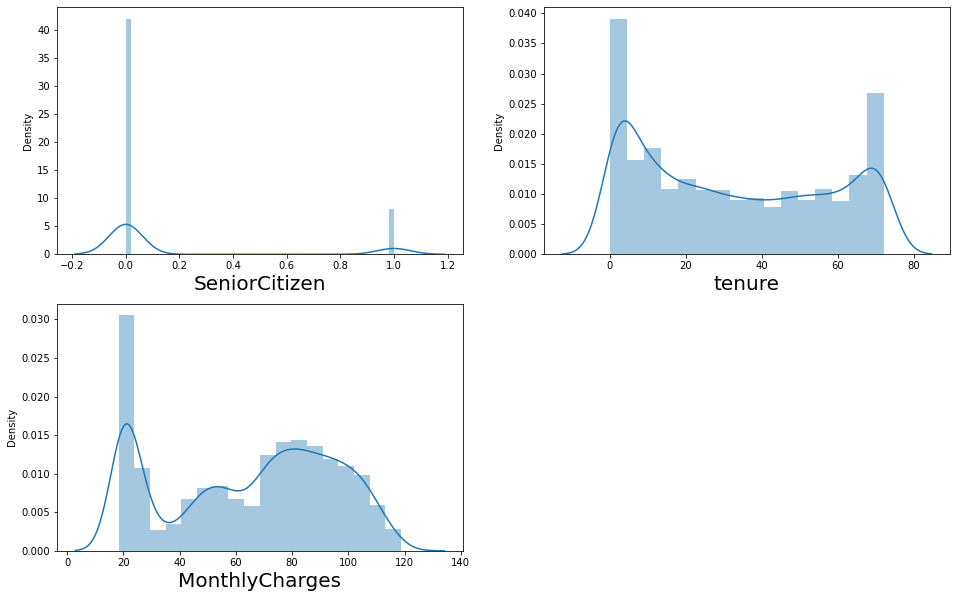

In [11]:
# Checking the normal distribution of the continuous features:
plt.figure(figsize=(16,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- Not even a single column isnormally distributed,each and every column is having skewness.

In [12]:
# Counting the customerID column:
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

- There are unique 7043 customer ids for the customers each.

In [13]:
#counting the customerID Variable:

df['customerID'].value_counts()

3703-KBKZP    1
0795-LAFGP    1
4291-YZODP    1
4176-RELJR    1
0347-UBKUZ    1
             ..
4468-KAZHE    1
1991-VOPLL    1
4102-HLENU    1
6319-QSUSR    1
7951-QKZPL    1
Name: customerID, Length: 7043, dtype: int64

- There are unique 7043 customer ids for the customers each.

In [14]:
# Counting the gender column:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

- Male and Female in gender column.

In [15]:
#counting the gender Variable:

df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

- Male and Female in gender column.Male customer are in no but differnce is very less.

Male      3555
Female    3488
Name: gender, dtype: int64

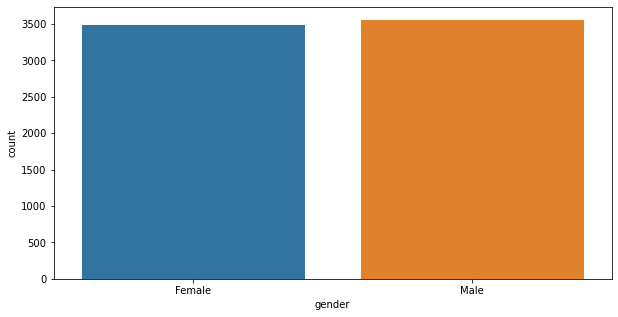

In [16]:
# Plotting the Gender column:
plt.figure(figsize=(10,5))
sns.countplot(df['gender'])
df['gender'].value_counts()

- Male and Female in gender column.Male customer are in no but differnce is very less.

In [17]:
# Counting the SeniorCitizen column:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

- There is ony two values in Senior Citizen column ,which are 0 and 1.

In [18]:
#counting the SeniorCitizen Variable:

df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

- The senior citizen contains 0 is higher in number than the senior citizen 1.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

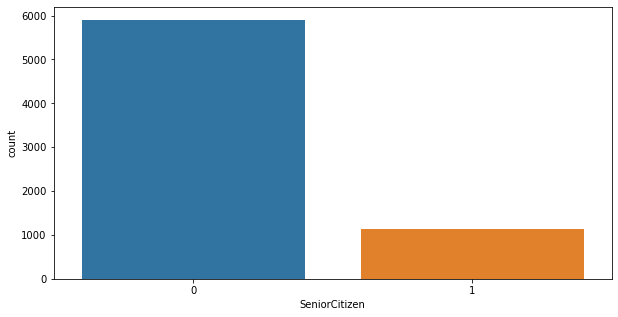

In [19]:
# Plotting the SEnior Citizen column:
plt.figure(figsize=(10,5))
sns.countplot(df['SeniorCitizen'])
df['SeniorCitizen'].value_counts()

- The senior citizen contains 0 is higher in number than the senior citizen 1.

In [20]:
# Counting the Partner column:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
#counting the Partner Variable

df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

- The column suggests the customer is having partner or not,(yes or no),No is greater than yes in numbers.about 48.% customer have their partners.

No     3641
Yes    3402
Name: Partner, dtype: int64

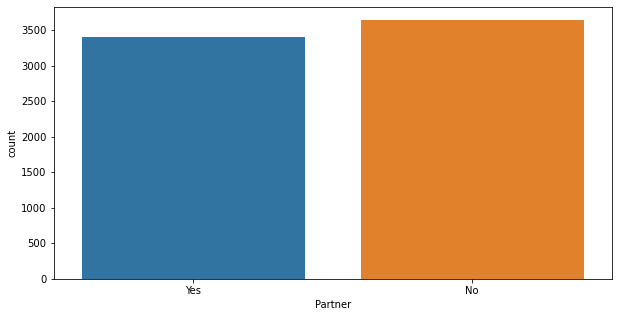

In [22]:
# Plotting the partner column:
plt.figure(figsize=(10,5))
sns.countplot(df['Partner'])
df['Partner'].value_counts()

- The column suggests the customer is having partner or not,(yes or no),No is greater than yes in numbers.about 48.% customer have their partners.

In [23]:
# Counting the Dependents column:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
#counting the Age Variable

df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

- About 30% of the subscribers have dependents.

No     4933
Yes    2110
Name: Dependents, dtype: int64

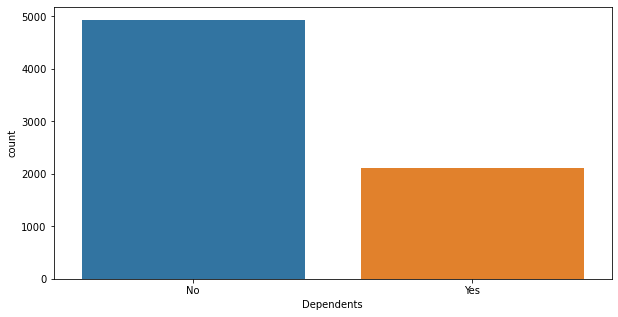

In [25]:
# Plotting the Dependents column:
plt.figure(figsize=(10,5))
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

- About 30% of the subscribers have dependents.

In [26]:
#counting the PhoneService Variable:

df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

- Most of the people is having phone services.About 10% of the subscribers is not having phone services.

Yes    6361
No      682
Name: PhoneService, dtype: int64

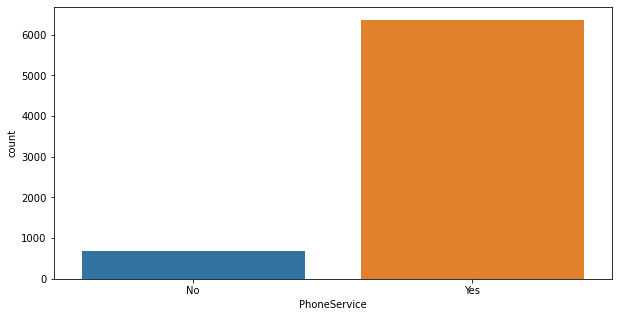

In [27]:
# Plotting Phone Service variable colummn:
plt.figure(figsize=(10,5))
sns.countplot(df['PhoneService'])
df['PhoneService'].value_counts()

- Most of the people is having phone services.About 10% of the subscribers is not having phone services.

In [28]:
#counting the MultipleLines Variable:

df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

- Most of the subsribers doesnt have multiple lines.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

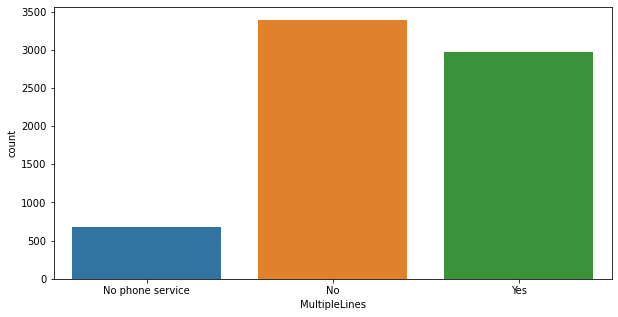

In [29]:
# Plotting Multiple Lines column:
plt.figure(figsize=(10,5))
sns.countplot(df['MultipleLines'])
df['MultipleLines'].value_counts()

- Most of the subsribers doesnt have multiple lines.

In [30]:
#counting the InternetService Variable:

df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

- There are three types of Internet services. Fiber optic,DSL and NO internet services.About 45% of the subscribers uses Fibre optic cable.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

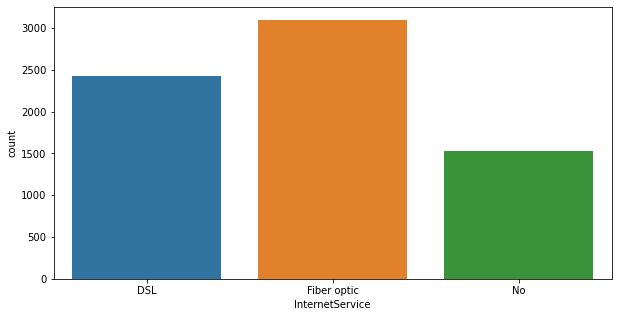

In [31]:
# Plotting the internet Service variable:
plt.figure(figsize=(10,5))
sns.countplot(df['InternetService'])
df['InternetService'].value_counts()

- There are three types of Internet services. Fiber optic,DSL and NO internet services.About 45% of the subscribers uses Fibre optic cable.

In [32]:
#counting the OnlineSecurity Variable:

df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

- Most of the people doesnt have online security system,this may be the cause of churn.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

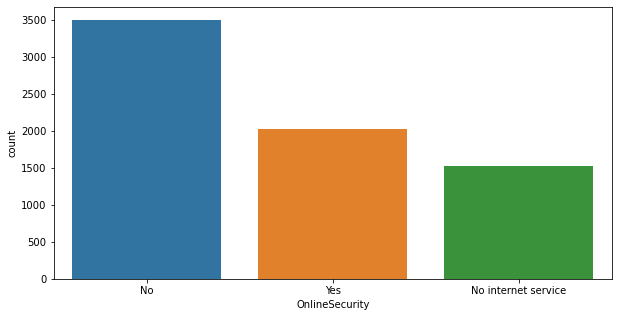

In [33]:
# Plotting online Security column:
plt.figure(figsize=(10,5))
sns.countplot(df['OnlineSecurity'])
df['OnlineSecurity'].value_counts()

- Most of the people doesnt have online security system,this may be the cause of churn.

In [34]:
#counting theOnlineBackup Variable:

df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

- Most of the people doesnt have OnlineBackup system,this may also be the cause of churn.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

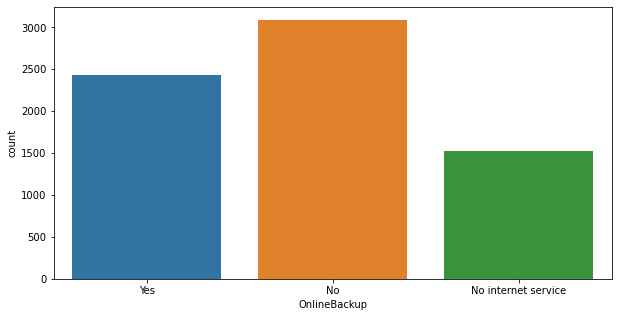

In [35]:
# Plotting onlinebackup column:
plt.figure(figsize=(10,5))
sns.countplot(df['OnlineBackup'])
df['OnlineBackup'].value_counts()

- Most of the people doesnt have OnlineBackup system,this may also be the cause of churn.

In [36]:
#counting the DeviceProtection Variable:

df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

- Most of the people doesnt have DeviceProtection system,this may also be the cause of churn.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

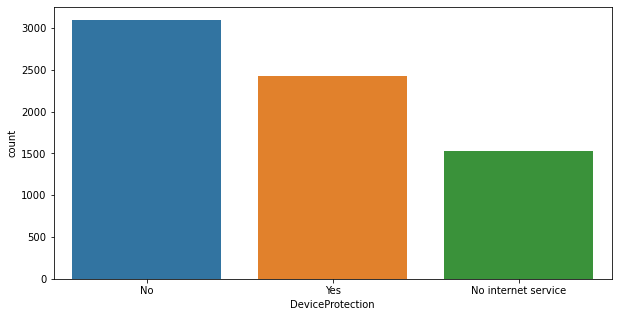

In [37]:
#Plotting DeviceProtection column:
plt.figure(figsize=(10,5))
sns.countplot(df['DeviceProtection'])
df['DeviceProtection'].value_counts()

- Most of the people doesnt have DeviceProtection system,this may also be the cause of churn.

In [38]:
#counting theTechSuppor Variable:

df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

- Most of the subscribers doesnt have TechSupport system,this may also be the cause of churn.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

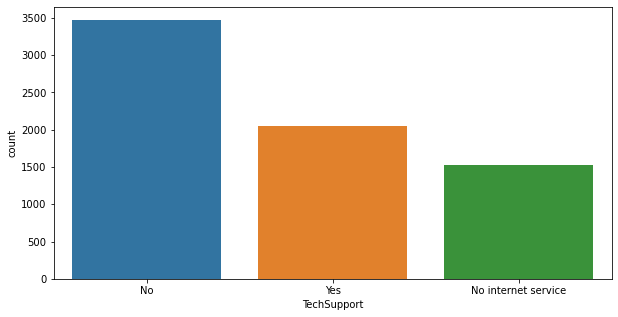

In [39]:
# Plotting the TechSupport column:
plt.figure(figsize=(10,5))
sns.countplot(df['TechSupport'])
df['TechSupport'].value_counts()

- Most of the subscribers doesnt have TechSupport system,this may also be the cause of churn.

In [40]:
#counting the Age Variable

df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

- About 40% of the user did not opt for the Streaming Tv service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

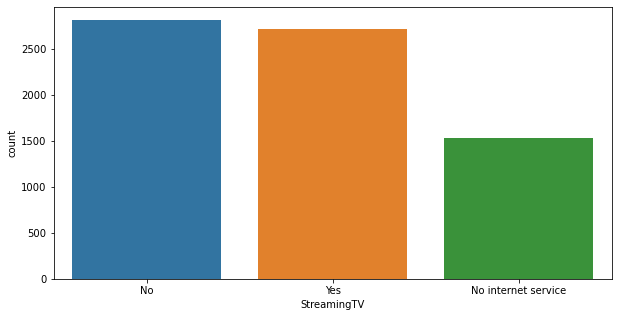

In [41]:
# Plotting StreamingTV column:
plt.figure(figsize=(10,5))
sns.countplot(df['StreamingTV'])
df['StreamingTV'].value_counts()

- About 40% of the user did not opt for the Streaming Tv service.

In [42]:
#counting the StreamingMovies Variable:

df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

- About 40% of the user did not opt for the Streaming Movies service.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

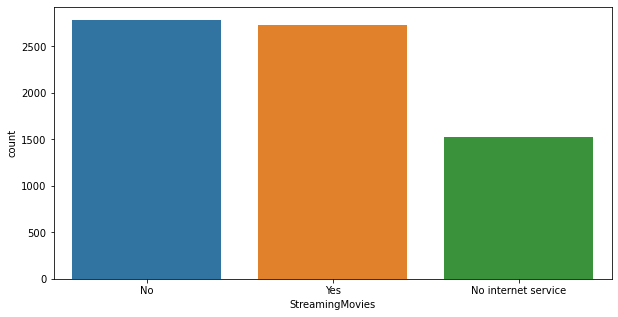

In [43]:
# Plotting the StreamingMovies column:
plt.figure(figsize=(10,5))
sns.countplot(df['StreamingMovies'])
df['StreamingMovies'].value_counts()

- About 40% of the user did not opt for the Streaming Movies service.the company may give offers regarding opting for Streaming movies because entertainment is a good selling point in this industry.

In [44]:
#counting the Contract Variable:

df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

- Most of the subscriber is having monthly subscription.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

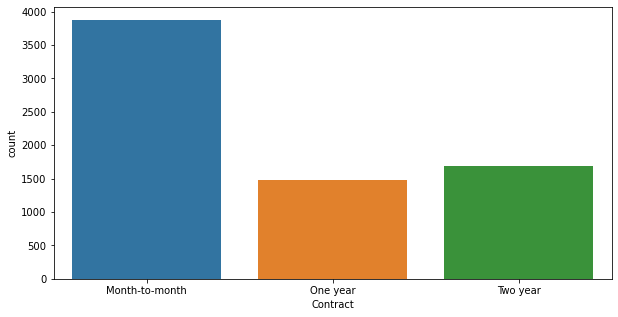

In [45]:
# Plotting the Contract column:
plt.figure(figsize=(10,5))
sns.countplot(df['Contract'])
df['Contract'].value_counts()

- Most of the subscriber is having monthly subscription.

In [46]:
#counting the PaperlessBilling Variable:

df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

- Paperless billing helps you eliminate extra paper mail while also helping the environment. By going paperless, you can receive bills through email or by utilizing your free online account. You can also pay bills online or set up automatic payments.This is a god sign that most of the subscribers us Paperless Billing Services.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

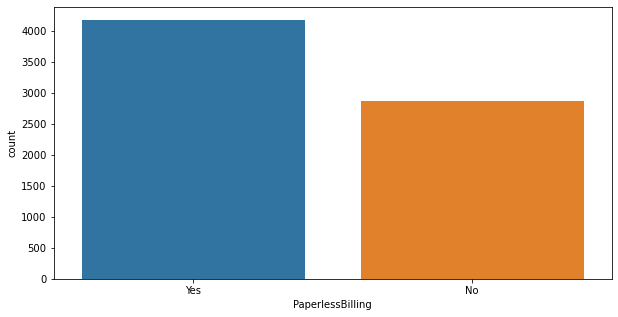

In [47]:
# Plotting Paperless Billing Column:
plt.figure(figsize=(10,5))
sns.countplot(df['PaperlessBilling'])
df['PaperlessBilling'].value_counts()

- Paperless billing helps you eliminate extra paper mail while also helping the environment. By going paperless, you can receive bills through email or by utilizing your free online account. You can also pay bills online or set up automatic payments.This is a god sign that most of the subscribers us Paperless Billing Services.

In [48]:
#counting the PaymentMethod Variable:

df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

- Most of the subscribers uses Electronic Check to pay the subscription fees.Payment System doesnt have any relation with churn of the subscribers.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

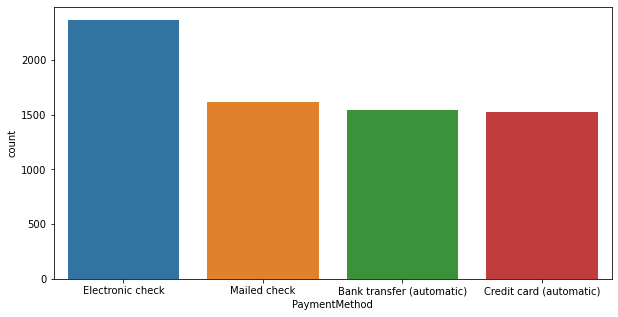

In [49]:
# PLotting the Payment Method:
plt.figure(figsize=(10,5))
sns.countplot(df['PaymentMethod'])
df['PaymentMethod'].value_counts()

- Most of the subscribers uses Electronic Check to pay the subscription fees.Payment System doesnt have any relation with churn of the subscribers.

In [50]:
#counting the TotalCharges Variable:

df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
3019.5      1
679.8       1
1067.65     1
206.15      1
401.3       1
Name: TotalCharges, Length: 6531, dtype: int64

In [51]:
#counting the Churn Variable:

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Churn'>

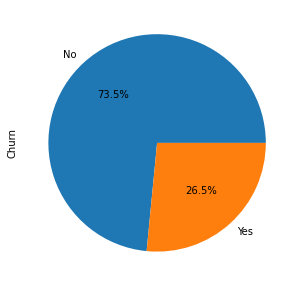

In [52]:
# Plotting the churn  column:
df['Churn'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

- In the given dataset 26.5% of the customer leaves the services.

# BI VARIATE ANALYSIS:

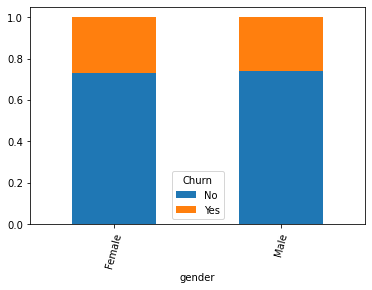

In [53]:
# PLOTTING CHURN VS GENDER COLUMN:
ct = pd.crosstab(df.gender, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Gender plays no role whether the customer will leave the service or not.

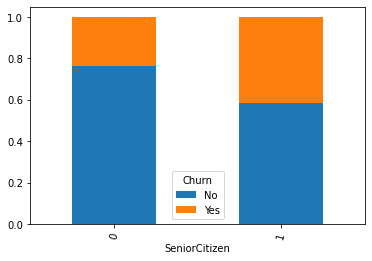

In [54]:
# PLOTTING SENIOR CITIZEN VS CHURN COLUMN:
ct = pd.crosstab(df.SeniorCitizen, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Senior citizen are more likely to leave the services.The company may give some senior citizen subsidies to retain the senior citizens.

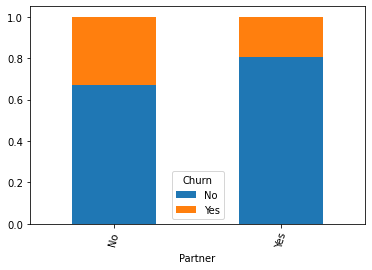

In [55]:
#PLOTTING PARTNER VS CHURN COLUMN:
ct = pd.crosstab(df.Partner, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having partner make them less likey to leave the service.

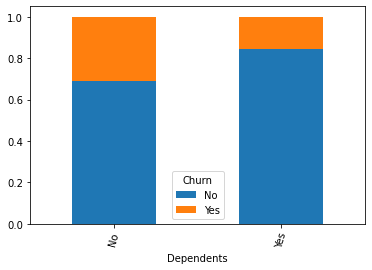

In [56]:
#PLOTTING DEPENDENTS VS CHURN COLUMN:
ct = pd.crosstab(df.Dependents, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having No dependents can make the subscriber leave the service.

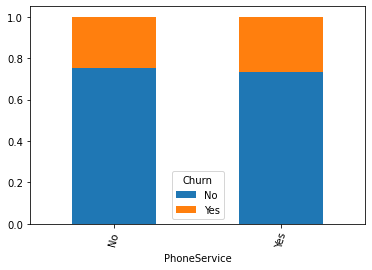

In [57]:
# PLOTTING PHONESERVICE VS CHURN COLUMN:
ct = pd.crosstab(df.PhoneService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having phone service do not have any impact on customer leaving the service.

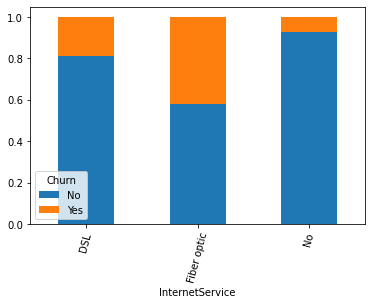

In [58]:
#PLOTTING INTERNET SERVICE VS CHURN COLUMN :
ct = pd.crosstab(df.InternetService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having No internet service can make the user stay with the service.

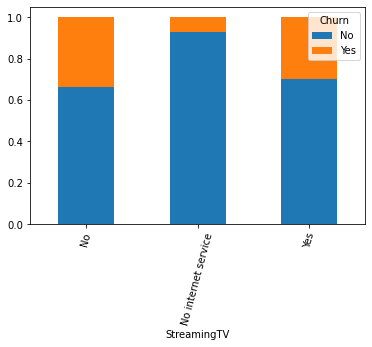

In [59]:
# PLOTTING STREAMING TV VS CHURN COLUMN:
ct = pd.crosstab(df.StreamingTV, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having No internet service can make the user stay with the service.

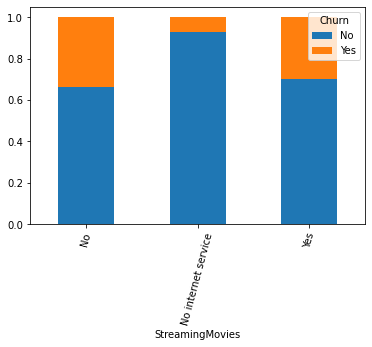

In [60]:
# PLOTTING THE STREAMING MOVIES VS CHURN COLUMN:
ct = pd.crosstab(df.StreamingMovies, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Same like streaming TV, users with no internet service have less chance of leaving the service.

- Is there something wrong with the internet service?

- Churn is mrore among the users who use internet services like Fibre Optics and DSL.

- The telecom company need to check if the quality of service needs to be improved.

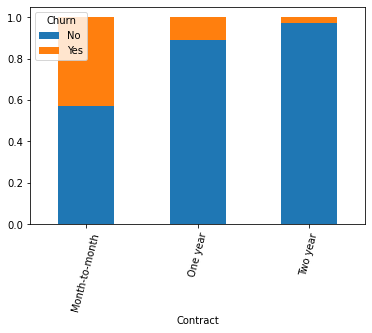

In [61]:
#PLOTTING CONTRACT VS CHURN COLUMN:
ct = pd.crosstab(df.Contract, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

- Having a long contract can make the user stays with the services.

- Company has to make the long plan more attractive.

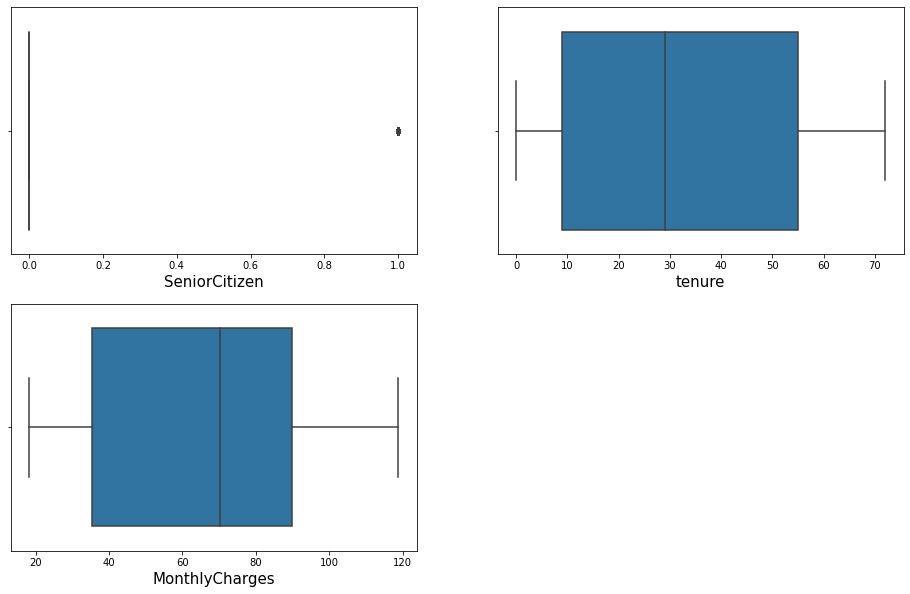

In [62]:
#CHECKING OUTLIERS BY USING BOXPLOT:
plt.figure(figsize=(16,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(con_features[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

- There is no outliers presents. Since senior citizen has only 2 variable,1 is showing as outliers which is not correct.

In [63]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

- Senior citizen is more of a categorical data hence we can conclude that there is no skewness present in the dataset.

In [64]:
# LABEL ENCODING THE CHURN COLUMN:

In [65]:
l = LabelEncoder()
l_s = ['Churn']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


- we can see that the Churn column  is encoded with 0 and 1. 0 Means No and 1 means Yes.

In [67]:
#### dividing the feature and label for further operations:
y = df['Churn']
x = df.drop(columns=['Churn'])

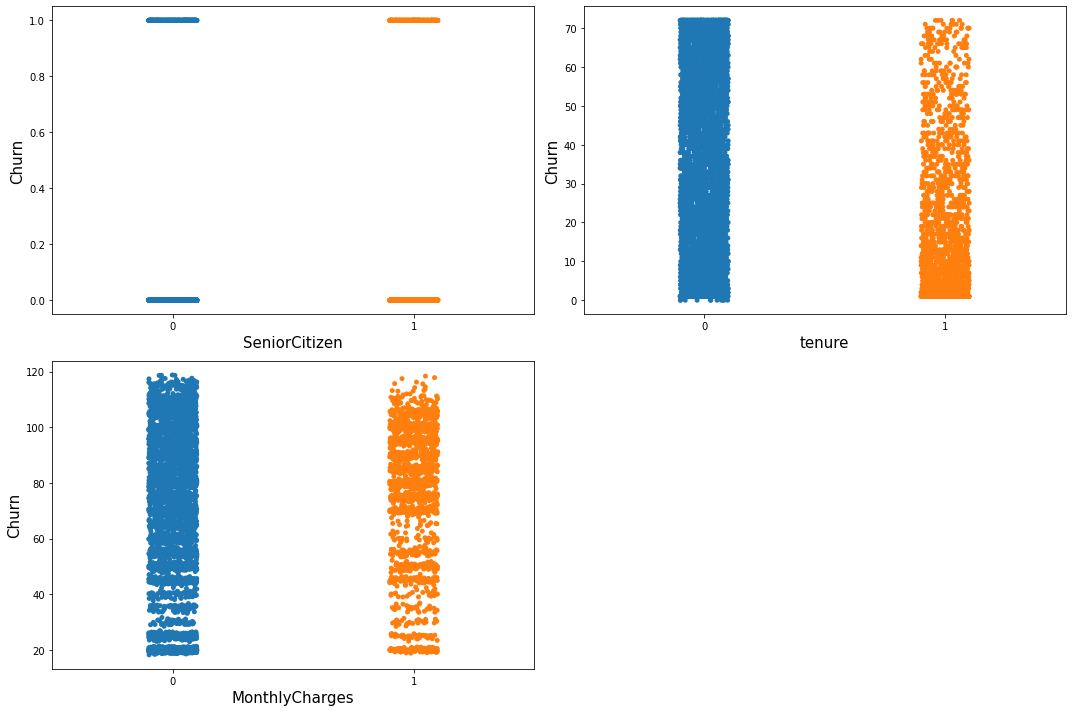

In [68]:
# Checking the relation between the label column and continuous features:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=3:
        ax=plt.subplot(2,2,plotnumber)
        sns.stripplot(y,con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Churn',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- Churn is somewhat related to Tenur and Monthly charges.

# MULTI VARIATE ANALYSIS:

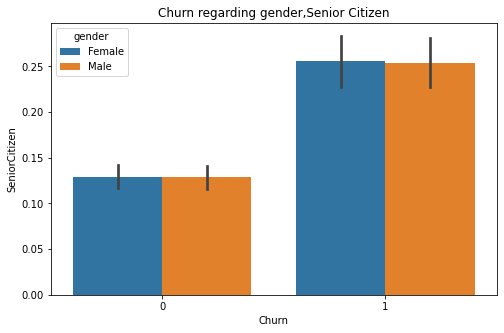

In [75]:
# PLOTTING CHURN VS SENIOR CITIZEN VS GENDER COLUMN:
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='SeniorCitizen',hue='gender',data=df).set_title('Churn regarding gender,Senior Citizen')
plt.show()

- we can not conclude anything compared to gender,because gender column is equally propotionate with males and females.
- The senior citizen is more likely to churn.

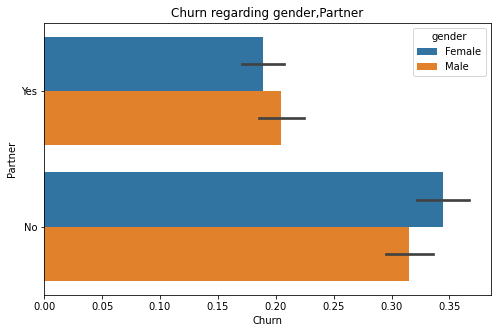

In [76]:
# PLOTTING CHURN VS PARTNER VS GENDER:
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='Partner',hue='gender',data=df).set_title('Churn regarding gender,Partner')
plt.show()

- The column suggests the customer is having partner or not,(yes or no),No is greater than yes in numbers.about 48.% customer have their partners.

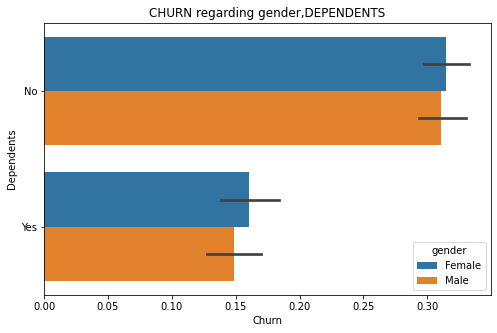

In [77]:
# PLOTTING CHURN VS DEPENDENTS VS APPLICANTINCOME
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='Dependents',hue='gender',data=df).set_title('CHURN regarding gender,DEPENDENTS')
plt.show()

- One third of the people are Dependents and which subscribers have no dependents are more likely to churn.

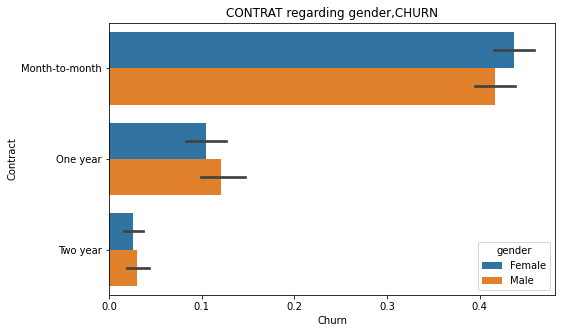

In [79]:
#PLOTTING CHURN VS GENDER VS CONTRACT
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='Contract',hue='gender',data=df).set_title('CONTRAT regarding gender,CHURN')
plt.show()

- Monthly subscriber is greater in this dataset and they too are having higher chances of Churn.
- Long term Subscriber is having lesser possibility of having Churned.
- We cannot predict anything by gender basis as the Males and Females subbscribers is equaly proportionate. 

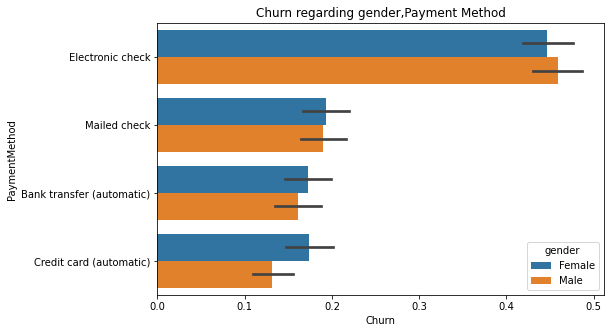

In [81]:
# PLOTTING CHURN VS PAYMENT METHOD VS GENDER
plt.figure(figsize=(8,5))
sns.barplot(x='Churn',y='PaymentMethod',hue='gender',data=df).set_title('Churn regarding gender,Payment Method')
plt.show()

- ELECTRONIC CHECK is used mostly.
- We cannot predict anything by gender basis as the Males and Females subbscribers is equaly proportionate.

<AxesSubplot:>

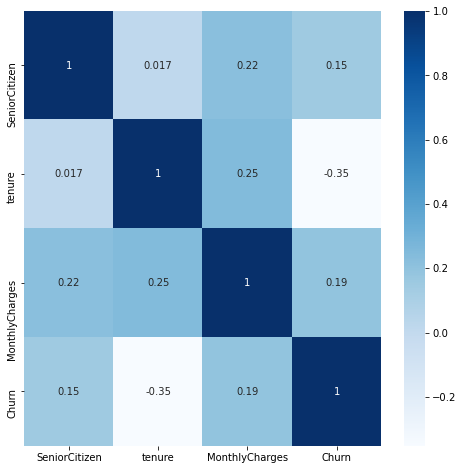

In [106]:
# Checking multi colinearity:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

- Since most of the features are categorical we have only few data to check corelation.

- From above we can say that none of the numerical features are co related with each other.

In [82]:
# Converting the object columns into numerical by using Ordinal encoder:

In [84]:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1


- All the columns are converted into numerical data.Now it is ready to implement this data to put into the model for further prediction.

In [85]:
# checking skewnes:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

- we can see that phone service column and Senior Citizen columns are highly skewed.

In [86]:
#Using Z-score to remove outliers:
z_score = zscore(df[['SeniorCitizen','PhoneService']])     
abs_z_score=np.abs(z_score)#converting data into standard normal distribution

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.0,6361.000000,6361.000000,6361.000000,...,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000,6361.000000
mean,3516.684012,0.503694,0.163182,0.485930,0.299324,32.439082,1.0,0.934130,0.966515,0.785726,...,0.905518,0.791699,1.001415,1.005188,0.691086,0.594875,1.572866,67.199041,3309.241000,0.267096
std,2033.617910,0.500026,0.369561,0.499841,0.457998,24.595120,0.0,0.997907,0.715712,0.845162,...,0.866771,0.846655,0.871905,0.871891,0.834212,0.490955,1.068744,30.449604,1896.790942,0.442478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1753.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,44.750000,1610.000000,0.000000
50%,3507.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.0,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.700000,3385.000000,0.000000
75%,5276.000000,1.000000,0.000000,1.000000,1.000000,56.000000,1.0,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,91.250000,4969.000000,1.000000
max,7041.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.0,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


- We can see that there is still skewness in phone service column and senior citizen column.we will use power transformer to remove the skewness.

In [110]:
df.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64


- We can see that there is still skewness in phone service column and senior citizen column.we will use power transformer to remove the skewness.

In [87]:
# Using power Transformer to reduce the skewness further:

In [88]:
features=['SeniorCitizen','PhoneService']

In [89]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [90]:
df[features]=scaler.fit_transform(df[features].values)#scaling the features

In [91]:
df[features]

,SeniorCitizen,PhoneService
1,-0.441591,0.0
2,-0.441591,0.0
4,-0.441591,0.0
5,-0.441591,0.0
6,-0.441591,0.0
...,...,...
7037,-0.441591,0.0
7038,-0.441591,0.0
7039,-0.441591,0.0
7041,2.264538,0.0


- Now the skewness is removed.

In [115]:
df.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
Churn               1.053055
dtype: float64

- Now the skewness is removed and thus the dataset is ready for building models for prediction.

In [94]:
#dividing the dataset into feature and target.

In [116]:
y=df['Churn']
x=df.drop(columns=['Churn'])

In [95]:
# After separation the target with features we are going to balance the target before model creation.

In [117]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [118]:
y.value_counts()

1    4662
0    4662
Name: Churn, dtype: int64

- The Target feature is now  balanced .

# Standardization:

In [119]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# VIF:

In [120]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.004320,customerID
1,1.003987,gender
2,1.162473,SeniorCitizen
3,1.477940,Partner
4,1.398011,Dependents
5,2.941591,tenure
6,NaN,PhoneService
7,1.436350,MultipleLines
8,1.471961,InternetService
9,1.301384,OnlineSecurity


# Hold out Method:

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=41)

# BUILDING MODELS:

# 1.LOGISTIC REGRESSION:

In [122]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:78.49%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.804314     0.768143  0.784928     0.786229      0.786138
recall        0.750216     0.819294  0.784928     0.784755      0.784928
f1-score      0.776324     0.792895  0.784928     0.784609      0.784651
support    3479.000000  3514.000000  0.784928  6993.000000   6993.000000
 Confusion Matrix:
[[2610  869]
 [ 635 2879]]



In [123]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:78.04%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.823529     0.745750  0.780352     0.784640      0.785223
recall        0.721893     0.840592  0.780352     0.781243      0.780352
f1-score      0.769369     0.790336  0.780352     0.779853      0.779695
support    1183.000000  1148.000000  0.780352  2331.000000   2331.000000
 Confusion Matrix:
[[854 329]
 [183 965]]



In [124]:
roc_auc_score(y_test,lr.predict(x_test))

0.781242912809517

# 2. DECISION TREE CLASSIFIER:

In [125]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3479.0  3514.0       1.0     6993.0        6993.0
 Confusion Matrix:
[[3479    0]
 [   0 3514]]



In [126]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:80.14%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.807692     0.795004  0.801373     0.801348      0.801444
recall        0.798817     0.804007  0.801373     0.801412      0.801373
f1-score      0.803230     0.799480  0.801373     0.801355      0.801383
support    1183.000000  1148.000000  0.801373  2331.000000   2331.000000
 Confusion Matrix:
[[945 238]
 [225 923]]



In [127]:
roc_auc_score(y_test,dt.predict(x_test))

0.8014117683442261

# 3.RANDOM FORREST CLASSIFIER:

In [128]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    3479.0  3514.0       1.0     6993.0        6993.0
 Confusion Matrix:
[[3479    0]
 [   0 3514]]



In [129]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")


Accuracy score:86.49%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.855155     0.875564  0.864865     0.865360      0.865206
recall        0.883347     0.845819  0.864865     0.864583      0.864865
f1-score      0.869023     0.860434  0.864865     0.864729      0.864793
support    1183.000000  1148.000000  0.864865  2331.000000   2331.000000
 Confusion Matrix:
[[1045  138]
 [ 177  971]]



In [130]:
roc_auc_score(y_test,rf.predict(x_test))

0.8645831185699854

# 4.KNEIGHBORS CLASSIFIER:

In [131]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:85.77%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.927981     0.807871  0.857715     0.867926      0.867625
recall        0.774073     0.940524  0.857715     0.857298      0.857715
f1-score      0.844068     0.869165  0.857715     0.856617      0.856679
support    3479.000000  3514.000000  0.857715  6993.000000   6993.000000
 Confusion Matrix:
[[2693  786]
 [ 209 3305]]



In [132]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:77.65%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.869420     0.718467  0.776491     0.793943      0.795077
recall        0.658495     0.898084  0.776491     0.778289      0.776491
f1-score      0.749399     0.798297  0.776491     0.773848      0.773481
support    1183.000000  1148.000000  0.776491  2331.000000   2331.000000
 Confusion Matrix:
[[ 779  404]
 [ 117 1031]]



In [133]:
roc_auc_score(y_test,kn.predict(x_test))

0.7782894872482115

# 5. SUPPORT VECTOR CLASSIFIER:

In [134]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:87.66%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.823529     0.745750  0.780352     0.784640      0.785223
recall        0.721893     0.840592  0.780352     0.781243      0.780352
f1-score      0.769369     0.790336  0.780352     0.779853      0.779695
support    1183.000000  1148.000000  0.780352  2331.000000   2331.000000
 Confusion Matrix:
[[3051  428]
 [ 435 3079]]



In [135]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:83.53%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.844100     0.826496  0.835264     0.835298      0.835430
recall        0.828402     0.842334  0.835264     0.835368      0.835264
f1-score      0.836177     0.834340  0.835264     0.835259      0.835273
support    1183.000000  1148.000000  0.835264  2331.000000   2331.000000
 Confusion Matrix:
[[980 203]
 [181 967]]



In [136]:
roc_auc_score(y_test,svc.predict(x_test))

0.8353684308187123

# 6.GRADIENT BOOST CLASSIFIER:

In [137]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_train)
gbc_clf_report = pd.DataFrame(classification_report(y_train,gbc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,gbc_pred)}\n")

Accuracy score:87.67%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.869528     0.884125  0.876734     0.876827      0.876863
recall        0.885024     0.868526  0.876734     0.876775      0.876734
f1-score      0.877208     0.876256  0.876734     0.876732      0.876730
support    3479.000000  3514.000000  0.876734  6993.000000   6993.000000
 Confusion Matrix:
[[3079  400]
 [ 462 3052]]



In [138]:
gbc_pred=gbc.predict(x_test)
gbc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,gbc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{gbc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,gbc_pred)}\n")

Accuracy score:86.36%
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.844100     0.826496  0.835264     0.835298      0.835430
recall        0.828402     0.842334  0.835264     0.835368      0.835264
f1-score      0.836177     0.834340  0.835264     0.835259      0.835273
support    1183.000000  1148.000000  0.835264  2331.000000   2331.000000
 Confusion Matrix:
[[1021  162]
 [ 156  992]]



In [139]:
roc_auc_score(y_test,gbc.predict(x_test))

0.8635857575820052

# CROSS VALIDATION SCORE:

In [140]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:77.66%


In [141]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:79.72%


In [142]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:84.03%


In [143]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:68.95%


In [144]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:54.59%


In [145]:
print(f"CV Score of GBC:{cross_val_score(gbc,x,y,cv=5).mean()*100:.2f}%")

CV Score of GBC:83.96%


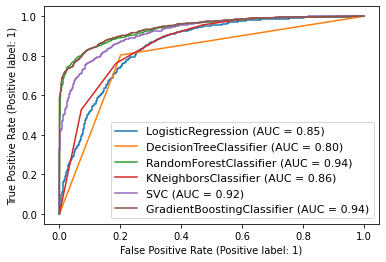

In [146]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- Choosing random forrest model as the best model because we got the least differnce between the accuracy score and cross validation score which is 86.49-84.03=2.46.

# HYPER PARAMETER TUNING OF THE RANDOM FORREST MODEL:

In [130]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [131]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [132]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [133]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 19}


In [134]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=35,min_samples_leaf = 8, min_samples_split=12,n_estimators =19)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8532818532818532

- After using Hyper Parameter tuning of the Random forrest model we got the score of 85.32%.

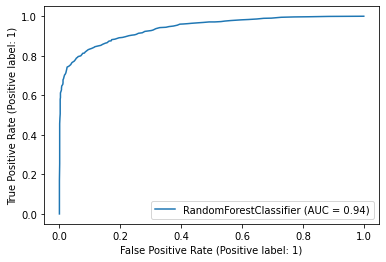

In [147]:
disp = plot_roc_curve(rf,x_test,y_test)

In [135]:
# model prediction using RF model:
x_predict = list(rf.predict(x_test))
rf_churn = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_churn))

      predicted_values  orignal_values
8857                 1               1
5450                 1               1
6690                 1               1
395                  1               0
7759                 1               1
...                ...             ...
3896                 0               0
53                   0               0
3409                 1               1
1410                 1               1
4422                 0               0

[2331 rows x 2 columns]


In [136]:
#import joblib
import joblib

joblib.dump(rf,'rf_churn_file.obj')

# SAVING THE MODEL

['rf_churn_file.obj']

In [137]:
rf_churn_joblib=joblib.load('rf_churn_file.obj')
rf_churn_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 1, 1, ..., 1, 1, 0])

# CONCLUSION:
- The predictions from the ML model can help in understanding the customers who might leave and their service. With this information the company can do the following: 
- Relationship Managers(RM) get a daily feed on who has the propensity to churn and what are the influencing factors:
- This can help trigger a conversation with the customer and understand their pain points and possibly fix the situation even before the churn occurs.
- This can create more customer entanglement as the RM would reach out to them anticipating issues will eventually increase their lifetime value.
- The model can be deployed to run on a regular basis to understand the changes in the behavior of the customers and the relationship managers can act accordingly.
- Collect more data from customers going forward such as reviews, ratings etc. to understand more about why a certain group of customers might be leaving .
- Capture the geographic information of the customer and correlate with some of the demographic attributes to find out patterns around customer churn and geography.
- By deploying data systems which can capture all these data sets we will be able to understand a complete profile of each customer and their activity and not only reduce customer churn but can also drive incremental revenue.